## Project Objective
To develop a machine learning classification model to predict weight categories (obesity, overweight, and insufficient weight) using relevant demographic, lifestyle, and health-related factors. This model is aimed at helping healthcare providers and policymakers better understand weight-related risk factors, enabling targeted interventions.

# Business Objectives
**Health Risk Assessment:** Classify individuals into weight categories based on predictor variables, enabling early intervention for those at risk of obesity or insufficient weight.

**Targeted Wellness Programs:** Support the design of health initiatives by identifying high-risk groups and tailoring wellness programs accordingly.
Personalized Preventative Measures: Provide personalized recommendations to individuals based on their classification to promote healthier habits and reduce long-term health risks.

**Public Health Policy:** Offer data-driven insights to assist in shaping public health policies focused on promoting balanced nutrition and physical activity.

**Technical Objective**
To develop a classification model utilizing the following predictors:



*   Demographics: Age, Height, Weight
*   Diet and Lifestyle: Eat_Vegetables, Meal_count, Smoking_Habit, Water_intake, Calorie_Monitoring
*   Physical Activity and Behavior: Physical_activity_freq, Screen_Time_Duration, Travel_Mode
*  Obesity_level: Target variable indicating obesity, overweight, or insufficient weight category



 The model's performance was evaluated using the F1-score to balance precision and recall, given the importance of accurate classification in each weight category.



## Importing necessary libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Loading the dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets for python/ObesityDataSet_raw_and_data_sinthetic.csv')
df = df.rename(columns={'FAVC': 'High_Caloric', 'FCVC': 'Eat_Vegetables','NCP':'Meal_count','CAEC':'Snack_Frequency','SMOKE':
                        "Smoking_Habit",'CH2O':"Water_intake",'SCC':'Calorie_Monitoring'
                        ,'FAF':'physical_activity_freq',
                        'TUE':'Screen_Time_Duration',
                        'CALC':'Alcohol_Usage','MTRANS':'Travel_Mode','NObeyesdad':'Obesity_level'})

##Defining the Variables

# * The dataset contains information on insurance claims and related factors

Here's an overview:

1.FAVC(High_calroic):Do you eat high caloric food frequently?

2.FCVC(Eat_Vegetables):Do you usually eat vegetables in your meals?

3.NCP(Meal Count):How many main meals do you have daily?

4.CAEC('Snack_Frequency):Do you eat any food between meals?

5.SMOKE(Smoking_Habit):Do you smoke?

6.CH20(Water_intake):How much water do you drink daily?

7.SCC(Calorie_Monitoring):Do you monitor the calories you eat daily?

8.FAF(physical_activity_freq):How often do you have physical activity?

9.TUE(Screen_Time_Duration):How much time do you use technological devices such as cell phone, videogames, television, computer and others?

10.CALC(Alcohol_Usage):How often do you drink alcohol?

11.MTRANS(Travel_Mode):Which transportation do you usually use?

12.NObeysdad(Obesity_level):	Obesity level

In [ ]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,High_Caloric,Eat_Vegetables,Meal_count,Snack_Frequency,Smoking_Habit,Water_intake,Calorie_Monitoring,physical_activity_freq,Screen_Time_Duration,Alcohol_Usage,Travel_Mode,Obesity_level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [ ]:
df.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,High_Caloric,Eat_Vegetables,Meal_count,Snack_Frequency,Smoking_Habit,Water_intake,Calorie_Monitoring,physical_activity_freq,Screen_Time_Duration,Alcohol_Usage,Travel_Mode,Obesity_level
1598,Male,30.686701,1.644517,100.004418,yes,yes,2.964050,2.123138,Sometimes,no,1.000000,no,1.699181,0.620465,no,Public_Transportation,Obesity_Type_II
1614,Male,31.627962,1.762389,118.548733,yes,yes,2.998441,3.000000,Sometimes,no,2.462916,no,0.554646,1.992190,Sometimes,Automobile,Obesity_Type_II
1268,Male,18.000000,1.820385,108.395005,yes,yes,2.000000,2.164839,Sometimes,no,2.094479,no,1.000000,0.676557,Sometimes,Public_Transportation,Obesity_Type_I
168,Female,22.000000,1.730000,79.000000,yes,yes,2.000000,1.000000,Sometimes,no,2.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I
227,Female,24.000000,1.620000,58.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight


## Basic Checks

In [ ]:
df.shape


(2111, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   High_Caloric                    2111 non-null   object 
 6   Eat_Vegetables                  2111 non-null   float64
 7   Meal_count                      2111 non-null   float64
 8   Snack_Frequency                 2111 non-null   object 
 9   Smoking_Habit                   2111 non-null   object 
 10  Water_intake                    2111 non-null   float64
 11  Calorie_Monitoring              2111 non-null   object 
 12  physical_activity_freq          21

In [ ]:
df.describe()

,Age,Height,Weight,Eat_Vegetables,Meal_count,Water_intake,physical_activity_freq,Screen_Time_Duration
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
df.nunique()

,0
Gender,2
Age,1402
Height,1574
Weight,1525
family_history_with_overweight,2
High_Caloric,2
Eat_Vegetables,810
Meal_count,635
Snack_Frequency,4
Smoking_Habit,2


## Data Preprocessing

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
High_Caloric,0
Eat_Vegetables,0
Meal_count,0
Snack_Frequency,0
Smoking_Habit,0


No null values found in  the datset


In [ ]:
#creating a copy of the dataframe
df1=df.copy()

In [ ]:
#df['Meal_count']=df['Meal_count'].astype(int)


# Checking all the numerical and categotrical columns

In [ ]:
#all_columns
print("all columms=",df1.columns)
print('--------------------------------')
print('categorial_columns=',df1.select_dtypes(include='object').columns)
print('--------------------------------')
print('numerical columns=',df1.select_dtypes(include='number').columns)

all columms= Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'High_Caloric', 'Eat_Vegetables', 'Meal_count', 'Snack_Frequency',
       'Smoking_Habit', 'Water_intake', 'Calorie_Monitoring',
       'physical_activity_freq', 'Screen_Time_Duration', 'Alcohol_Usage',
       'Travel_Mode', 'Obesity_level'],
      dtype='object')
--------------------------------
categorial_columns= Index(['Gender', 'family_history_with_overweight', 'High_Caloric',
       'Snack_Frequency', 'Smoking_Habit', 'Calorie_Monitoring',
       'Alcohol_Usage', 'Travel_Mode', 'Obesity_level'],
      dtype='object')
--------------------------------
numerical columns= Index(['Age', 'Height', 'Weight', 'Eat_Vegetables', 'Meal_count',
       'Water_intake', 'physical_activity_freq', 'Screen_Time_Duration'],
      dtype='object')


In [ ]:
#categorical column dataframe
df_cat=df1.select_dtypes(include='object')
df_cat.head()

,Gender,family_history_with_overweight,High_Caloric,Snack_Frequency,Smoking_Habit,Calorie_Monitoring,Alcohol_Usage,Travel_Mode,Obesity_level
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
numeric_cols=df1.select_dtypes(include='number').columns
numeric_cols

Index(['Age', 'Height', 'Weight', 'Eat_Vegetables', 'Meal_count',
       'Water_intake', 'physical_activity_freq', 'Screen_Time_Duration'],
      dtype='object')

## Checking for Outliers

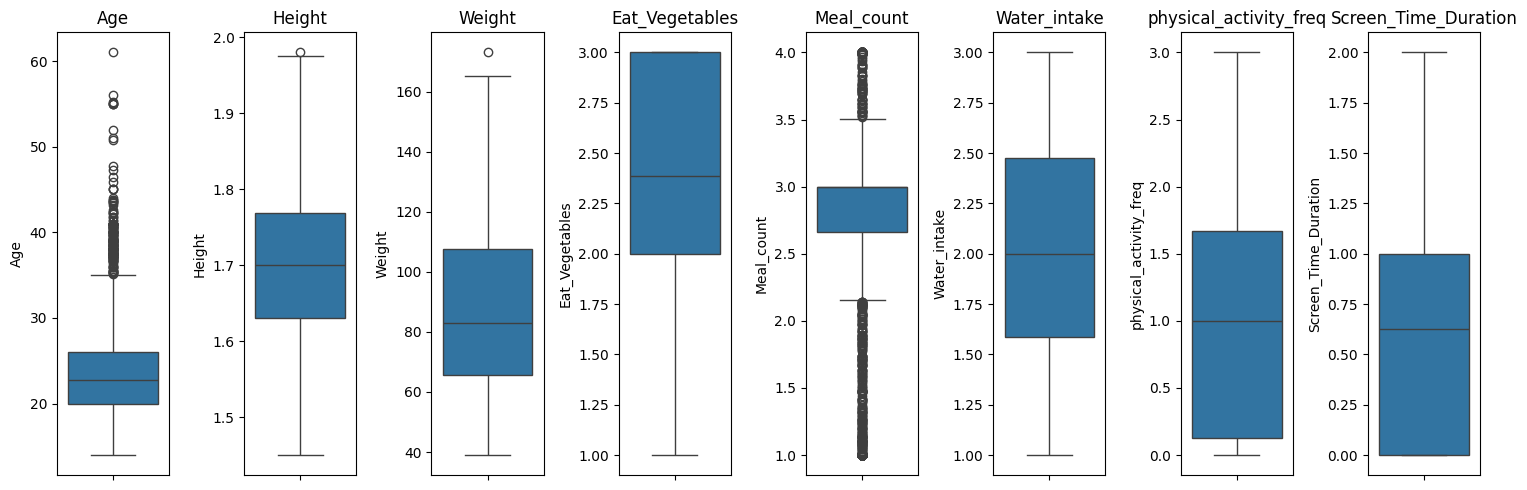

In [ ]:
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(15, 5))  # Adjust figsize as needed

for i, col in enumerate(numeric_cols):
  sns.boxplot(ax=axes[i], y=df1[col])
  axes[i].set_title(col)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()



This series of boxplots for different variables in the insurance dataset, providing a visual summary of the distribution, central tendency, and variability of the data, as well as highlighting any potential outliers. Here’s a breakdown of each plot:
1. Age:The median age is arround 23 and the max age is around 35 and min weight is 20.This columnn have significant outliers
2. Height: The range lies from 16.5 to 17.5 metres with no outliers.
3. weight : similarily the weight column have the following range in the box plot with a one outlier.
4. Meal count: This column have significant level of outliers as we can see in both the extreme quantile
5.water_intake: NO outliers
6.Physical activity_freq: NO outliers
7.Screem time duration:NO outliers

## Removing outliers using the IQR method

In [ ]:
Q1 = df1[numeric_cols].quantile(0.25)
Q3 = df1[numeric_cols].quantile(0.75)

IQR = Q3 - Q1

print(IQR)

Age                        6.052808
Height                     0.138464
Weight                    41.957339
Eat_Vegetables             1.000000
Meal_count                 0.341262
Water_intake               0.892607
physical_activity_freq     1.542172
Screen_Time_Duration       1.000000
dtype: float64


In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
#making a separte outliers that dont contain any outliers

df1_no_outliers = df1[~((df1[numeric_cols] < lower_bound) | (df1[numeric_cols] > upper_bound)).any(axis=1)]

In [ ]:
df1_no_outliers.head()

,Gender,Age,Height,Weight,family_history_with_overweight,High_Caloric,Eat_Vegetables,Meal_count,Snack_Frequency,Smoking_Habit,Water_intake,Calorie_Monitoring,physical_activity_freq,Screen_Time_Duration,Alcohol_Usage,Travel_Mode,Obesity_level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight


## Basic checks on the outlier frame dataframe

In [ ]:
df1_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1409 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1409 non-null   object 
 1   Age                             1409 non-null   float64
 2   Height                          1409 non-null   float64
 3   Weight                          1409 non-null   float64
 4   family_history_with_overweight  1409 non-null   object 
 5   High_Caloric                    1409 non-null   object 
 6   Eat_Vegetables                  1409 non-null   float64
 7   Meal_count                      1409 non-null   float64
 8   Snack_Frequency                 1409 non-null   object 
 9   Smoking_Habit                   1409 non-null   object 
 10  Water_intake                    1409 non-null   float64
 11  Calorie_Monitoring              1409 non-null   object 
 12  physical_activity_freq          1409 no

## Feature Engineering

In [ ]:

numerical_data=df1_no_outliers.select_dtypes(include='number')
numerical_data.head()

,Age,Height,Weight,Eat_Vegetables,Meal_count,Water_intake,physical_activity_freq,Screen_Time_Duration
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
5,29.0,1.62,53.0,2.0,3.0,2.0,0.0,0.0


##Correlation Matrix

<Axes: >

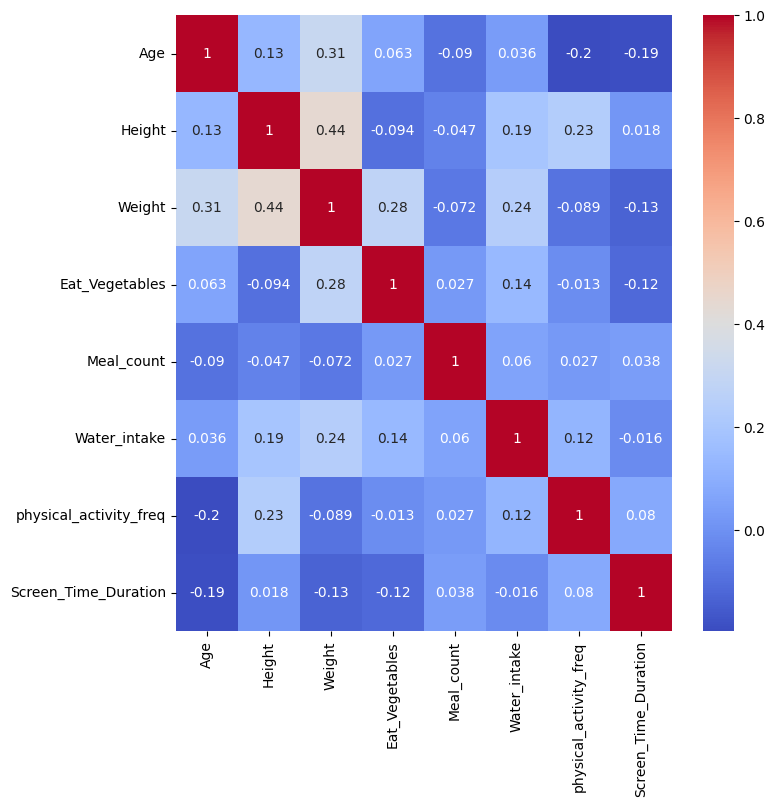

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(numerical_data.corr(),annot=True, cmap='coolwarm')

##Variation Inflation Factor (VIF)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = numerical_data

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,Age,36.250737
1,Height,255.016441
2,Weight,18.179144
3,Eat_Vegetables,22.668455
4,Meal_count,201.253651
5,Water_intake,13.674795
6,physical_activity_freq,2.839753
7,Screen_Time_Duration,2.578143


In [ ]:
#height vif=255.016. Dropping Height
numerical_data=numerical_data.drop('Height',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = numerical_data

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,Age,33.141861
1,Weight,15.403211
2,Eat_Vegetables,22.554958
3,Meal_count,54.829553
4,Water_intake,13.569184
5,physical_activity_freq,2.618580
6,Screen_Time_Duration,2.539322


In [ ]:
#dropping Meal_count  with vif=54.829553
numerical_data=numerical_data.drop('Meal_count',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = numerical_data

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,Age,20.033128
1,Weight,15.402401
2,Eat_Vegetables,18.032624
3,Water_intake,12.541722
4,physical_activity_freq,2.499125
5,Screen_Time_Duration,2.298302


In [ ]:
#dropping Age  with vif=20.033128
numerical_data=numerical_data.drop('Age',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = numerical_data

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,Weight,12.726871
1,Eat_Vegetables,14.640881
2,Water_intake,11.804359
3,physical_activity_freq,2.498881
4,Screen_Time_Duration,2.275589


In [ ]:
#dropping Eat_Vegetables  with vif=14.640881
numerical_data=numerical_data.drop('Eat_Vegetables',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = numerical_data

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,Weight,8.443129
1,Water_intake,9.954958
2,physical_activity_freq,2.451944
3,Screen_Time_Duration,2.235796


At the wnd we are left with the above numerical columns with no multicollinearity among them


In [ ]:
numerical_data.head()

,Weight,Water_intake,physical_activity_freq,Screen_Time_Duration
0,64.0,2.0,0.0,1.0
1,56.0,3.0,3.0,0.0
2,77.0,2.0,2.0,1.0
3,87.0,2.0,2.0,0.0
5,53.0,2.0,0.0,0.0


##Fetching the values dependent column

In [ ]:
target=df1_no_outliers['Obesity_level']
target.head()

,Obesity_level
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
5,Normal_Weight


##Categorical columns


In [ ]:
cat_cols = df1.select_dtypes(exclude=['number'])
cat_cols

,Gender,family_history_with_overweight,High_Caloric,Snack_Frequency,Smoking_Habit,Calorie_Monitoring,Alcohol_Usage,Travel_Mode,Obesity_level
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


##Calculating Cramer's V

In [ ]:
from scipy.stats import chi2_contingency
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.values.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

## Create contingency tables


In [ ]:
gender_familyoverweight = pd.crosstab(df1_no_outliers['Gender'], df1_no_outliers['family_history_with_overweight'])
gender_highcaloric = pd.crosstab(df1_no_outliers['Gender'], df1_no_outliers['High_Caloric'])
gender_smoke = pd.crosstab(df1_no_outliers['Gender'], df1_no_outliers['Smoking_Habit'])
gender_Snack_Frequency = pd.crosstab(df1_no_outliers['Gender'], df1_no_outliers['Snack_Frequency'])
gender_Travel_Mode = pd.crosstab(df1_no_outliers['Gender'], df1_no_outliers['Travel_Mode'])
gender_Calorie_Monitoring = pd.crosstab(df1_no_outliers['Gender'], df1_no_outliers['Calorie_Monitoring'])
gender_alcohol = pd.crosstab(df1_no_outliers['Gender'], df1_no_outliers['Alcohol_Usage'])

familyoverweight_highcaloric = pd.crosstab(df1_no_outliers['family_history_with_overweight'], df1_no_outliers['High_Caloric'])
familyoverweight_smoke = pd.crosstab(df1_no_outliers['family_history_with_overweight'], df1_no_outliers['Smoking_Habit'])
familyoverweight_Snack_Frequency = pd.crosstab(df1_no_outliers['family_history_with_overweight'], df1_no_outliers['Snack_Frequency'])
familyoverweight_Travel_Mode = pd.crosstab(df1_no_outliers['family_history_with_overweight'], df1_no_outliers['Travel_Mode'])
familyoverweight_Calorie_Monitoring = pd.crosstab(df1_no_outliers['family_history_with_overweight'], df1_no_outliers['Calorie_Monitoring'])
family_overweight_alcohol = pd.crosstab(df1_no_outliers['family_history_with_overweight'], df1_no_outliers['Alcohol_Usage'])

high_caloric_snacks = pd.crosstab(df1_no_outliers['High_Caloric'], df1_no_outliers['Snack_Frequency'])
high_caloric_smoke = pd.crosstab(df1_no_outliers['High_Caloric'], df1_no_outliers['Smoking_Habit'])
high_caloric_Travel_Mode = pd.crosstab(df1_no_outliers['High_Caloric'], df1_no_outliers['Travel_Mode'])
high_caloric_Calorie_Monitoring = pd.crosstab(df1_no_outliers['High_Caloric'], df1_no_outliers['Calorie_Monitoring'])
high_caloric_alcohol = pd.crosstab(df1_no_outliers['High_Caloric'], df1_no_outliers['Alcohol_Usage'])

snacks_smoke = pd.crosstab(df1_no_outliers['Snack_Frequency'], df1_no_outliers['Smoking_Habit'])
snacks_Travel_Mode = pd.crosstab(df1_no_outliers['Snack_Frequency'], df1_no_outliers['Travel_Mode'])
snacks_Calorie_Monitoring = pd.crosstab(df1_no_outliers['Snack_Frequency'], df1_no_outliers['Calorie_Monitoring'])
snacks_alcohol = pd.crosstab(df1_no_outliers['Snack_Frequency'], df1_no_outliers['Alcohol_Usage'])

smoke_Travel_Mode = pd.crosstab(df1_no_outliers['Smoking_Habit'], df1_no_outliers['Travel_Mode'])
smoke_Calorie_Monitoring = pd.crosstab(df1_no_outliers['Smoking_Habit'], df1_no_outliers['Calorie_Monitoring'])
smoke_alcohol = pd.crosstab(df1_no_outliers['Smoking_Habit'], df1_no_outliers['Alcohol_Usage'])

calori_monitoring_alcohol=pd.crosstab(df1_no_outliers['Calorie_Monitoring'], df1_no_outliers['Alcohol_Usage'])
calori_monitoring_travel=pd.crosstab(df1_no_outliers['Calorie_Monitoring'], df1_no_outliers['Travel_Mode'])

alcohol_travel=pd.crosstab(df1_no_outliers['Alcohol_Usage'], df1_no_outliers['Travel_Mode'])


## Calculate Cramer's V for each pair


In [ ]:
cv_gender_familyoverweight = cramers_v(gender_familyoverweight)
cv_gender_highcaloric = cramers_v(gender_highcaloric)
cv_gender_smoke = cramers_v(gender_smoke)
cv_gender_Snack_Frequency = cramers_v(gender_Snack_Frequency)
cv_gender_Travel_Mode = cramers_v(gender_Travel_Mode)
cv_gender_Calorie_Monitoring = cramers_v(gender_Calorie_Monitoring)
cv_gender_alcohol = cramers_v(gender_alcohol)

cv_familyoverweight_highcaloric = cramers_v(familyoverweight_highcaloric)
cv_familyoverweight_smoke = cramers_v(familyoverweight_smoke)
cv_familyoverweight_Snack_Frequency = cramers_v(familyoverweight_Snack_Frequency)
cv_familyoverweight_Travel_Mode = cramers_v(familyoverweight_Travel_Mode)
cv_familyoverweight_Calorie_Monitoring = cramers_v(familyoverweight_Calorie_Monitoring)
cv_family_overweight_alcohol = cramers_v(family_overweight_alcohol)

cv_high_caloric_snacks = cramers_v(high_caloric_snacks)
cv_high_caloric_smoke = cramers_v(high_caloric_smoke)
cv_high_caloric_Travel_Mode = cramers_v(high_caloric_Travel_Mode)
cv_high_caloric_Calorie_Monitoring = cramers_v(high_caloric_Calorie_Monitoring)
cv_high_caloric_alcohol = cramers_v(high_caloric_alcohol)

cv_snacks_smoke = cramers_v(snacks_smoke)
cv_snacks_Travel_Mode = cramers_v(snacks_Travel_Mode)
cv_snacks_Calorie_Monitoring = cramers_v(snacks_Calorie_Monitoring)
cv_snacks_alcohol = cramers_v(snacks_alcohol)

cv_smoke_Travel_Mode = cramers_v(smoke_Travel_Mode)
cv_smoke_Calorie_Monitoring = cramers_v(smoke_Calorie_Monitoring)
cv_smoke_alcohol = cramers_v(smoke_alcohol)

cv_calori_monitoring_alcohol=cramers_v(calori_monitoring_alcohol)
cv_calori_monitoring_travel=cramers_v(calori_monitoring_travel)

cv_alcohol_travel=cramers_v(alcohol_travel)

# Association Matrix

In [ ]:
def calculate_cramers_v_matrix(data, columns):
    cramers_v_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)
    for col1 in columns:
        for col2 in columns:
            if col1 != col2:
                contingency_table = pd.crosstab(df1_no_outliers[col1], df1_no_outliers[col2])
                cramers_v_matrix.loc[col1, col2] = cramers_v(contingency_table)
            else:
                cramers_v_matrix.loc[col1, col2] = 1.0
    return cramers_v_matrix

In [ ]:
# Calculate Cramer's V matrix for the selected categorical variables
categorical_columns = df1.select_dtypes(include='object').columns
cramers_v_matrix = calculate_cramers_v_matrix(df1_no_outliers, categorical_columns)

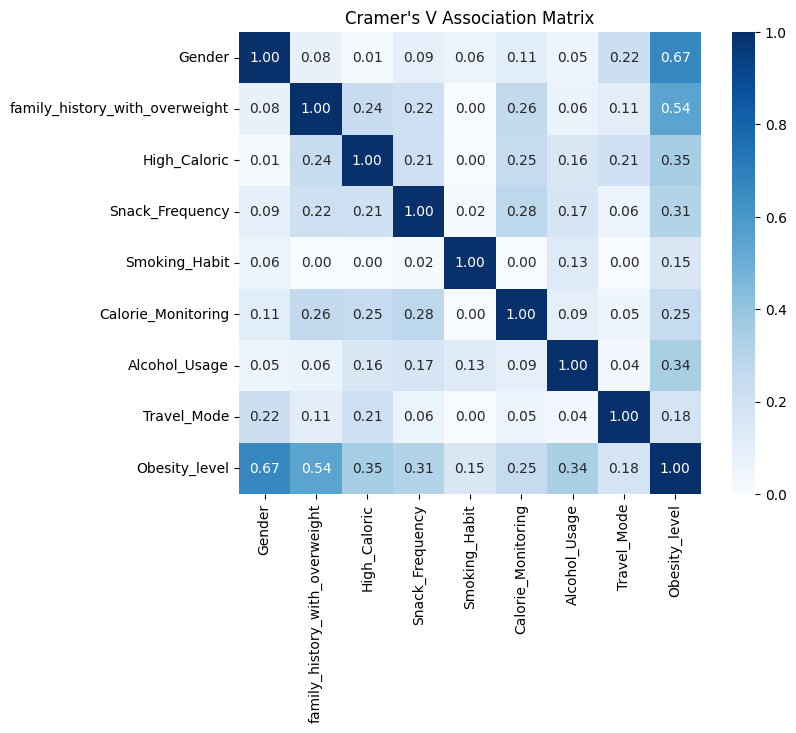

In [ ]:
# Visualize the association matrix with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='Blues', cbar=True, square=True, fmt=".2f")
plt.title("Cramer's V Association Matrix")
plt.show()

**1.Diagonal Values (1.00):**

The values along the diagonal  are all 1.00. This is expected because a variable is perfectly associated with itself.

**2.Off-diagonal Values:**
*   Gender vs. Obesity Level: Moderate association (0.67)
*   Family History with Overweight vs. Obesity Level: Moderate association (0.54)

*  High Caloric vs. Obesity Level: Moderate association (0.35)


*   Snack_Frequency vs Obesity Level: Moderate association (0.31)
*   Alcohol_Usage vs Obesity Level:Moderate association (0.34)


**Taking the  categorical columns(Snack_Frequency,Gender,Family_history_with_overweight,alcohol_usage) for further analysis**










# **Making a new dataframe for final modelling**

In [ ]:
df_new=df1_no_outliers.drop(['Gender','family_history_with_overweight','High_Caloric','Snack_Frequency','Alcohol_Usage'],axis=1,inplace=True)

<ipython-input-41-fd66d84fb298>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new=df1_no_outliers.drop(['Gender','family_history_with_overweight','High_Caloric','Snack_Frequency','Alcohol_Usage'],axis=1,inplace=True)


In [ ]:
df_new=df1_no_outliers.copy()

# Basic Check on the new dataframe created

In [ ]:
print(df_new.shape)
print('-'*100)
print(df_new.head())
print('-'*100)
print(df_new.info())

print('-'*100)
print(df_new.isnull().sum())


(1409, 12)
----------------------------------------------------------------------------------------------------
    Age  Height  Weight  Eat_Vegetables  Meal_count Smoking_Habit  \
0  21.0    1.62    64.0             2.0         3.0            no   
1  21.0    1.52    56.0             3.0         3.0           yes   
2  23.0    1.80    77.0             2.0         3.0            no   
3  27.0    1.80    87.0             3.0         3.0            no   
5  29.0    1.62    53.0             2.0         3.0            no   

   Water_intake Calorie_Monitoring  physical_activity_freq  \
0           2.0                 no                     0.0   
1           3.0                yes                     3.0   
2           2.0                 no                     2.0   
3           2.0                 no                     2.0   
5           2.0                 no                     0.0   

   Screen_Time_Duration            Travel_Mode       Obesity_level  
0                   1.0  Public

In [ ]:
df_new['Obesity_level'].value_counts().sort_values(ascending=False)

,count
Obesity_level,
Obesity_Type_III,323
Obesity_Type_II,220
Normal_Weight,199
Obesity_Type_I,197
Overweight_Level_II,172
Overweight_Level_I,150
Insufficient_Weight,148


In [ ]:
df_new.head()

,Age,Height,Weight,Eat_Vegetables,Meal_count,Smoking_Habit,Water_intake,Calorie_Monitoring,physical_activity_freq,Screen_Time_Duration,Travel_Mode,Obesity_level
0,21.0,1.62,64.0,2.0,3.0,no,2.0,no,0.0,1.0,Public_Transportation,Normal_Weight
1,21.0,1.52,56.0,3.0,3.0,yes,3.0,yes,3.0,0.0,Public_Transportation,Normal_Weight
2,23.0,1.80,77.0,2.0,3.0,no,2.0,no,2.0,1.0,Public_Transportation,Normal_Weight
3,27.0,1.80,87.0,3.0,3.0,no,2.0,no,2.0,0.0,Walking,Overweight_Level_I
5,29.0,1.62,53.0,2.0,3.0,no,2.0,no,0.0,0.0,Automobile,Normal_Weight


# **Mapping all the categroical columns**

In [ ]:
#Oridnal encoding on the following columns
df_new['Smoking_Habit']=df_new['Smoking_Habit'].map({'no':0,'yes':1})
df_new['Calorie_Monitoring']=df_new['Calorie_Monitoring'].map({'no':0,'yes':1})
df_new['Obesity_level']=df_new['Obesity_level'].map({
    'Insufficient_Weight':1,
    'Normal_Weight':2,
    'Overweight_Level_I':3,
    'Overweight_Level_II':4,
    'Obesity_Type_I':5,
   'Obesity_Type_II':6,
    'Obesity_Type_III':7,
    'Obesity_Type_IV':8})

In [ ]:
#checking the mapped dataframe
df_new.head()

,Age,Height,Weight,Eat_Vegetables,Meal_count,Smoking_Habit,Water_intake,Calorie_Monitoring,physical_activity_freq,Screen_Time_Duration,Travel_Mode,Obesity_level
0,21.0,1.62,64.0,2.0,3.0,0,2.0,0,0.0,1.0,Public_Transportation,2
1,21.0,1.52,56.0,3.0,3.0,1,3.0,1,3.0,0.0,Public_Transportation,2
2,23.0,1.80,77.0,2.0,3.0,0,2.0,0,2.0,1.0,Public_Transportation,2
3,27.0,1.80,87.0,3.0,3.0,0,2.0,0,2.0,0.0,Walking,3
5,29.0,1.62,53.0,2.0,3.0,0,2.0,0,0.0,0.0,Automobile,2


In [ ]:
#onehot encoding on the travel_mode column as it doesnt have any order
df_new = pd.get_dummies(df_new, columns=['Travel_Mode'], prefix=['Travel_Mode']).apply(lambda x: x.astype(int))
df_new.head()

,Age,Height,Weight,Eat_Vegetables,Meal_count,Smoking_Habit,Water_intake,Calorie_Monitoring,physical_activity_freq,Screen_Time_Duration,Obesity_level,Travel_Mode_Automobile,Travel_Mode_Bike,Travel_Mode_Motorbike,Travel_Mode_Public_Transportation,Travel_Mode_Walking
0,21,1,64,2,3,0,2,0,0,1,2,0,0,0,1,0
1,21,1,56,3,3,1,3,1,3,0,2,0,0,0,1,0
2,23,1,77,2,3,0,2,0,2,1,2,0,0,0,1,0
3,27,1,87,3,3,0,2,0,2,0,3,0,0,0,0,1
5,29,1,53,2,3,0,2,0,0,0,2,1,0,0,0,0


## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
x=df_new.drop('Obesity_level',axis=1)
y=df_new['Obesity_level']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
print("x_train: {}".format(x_train.shape))
print("x_test: {}".format(x_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}" .format(y_test.shape))

x_train: (986, 15)
x_test: (423, 15)
y_train: (986,)
y_test: (423,)


## Applying all the classification model and checking the performance of the model
(WEIGHTED F1 SCORE)



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import warnings

warnings.filterwarnings('ignore')

# KNN CLASSIFIER

In [ ]:
#importing necessary libraries for KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
F1KNN=f1_score(y_test, y_pred, average='weighted')
print('f1 score is: ', f1_score(y_test, y_pred, average='weighted'))
print('-'*100)
print(classification_report(y_test,y_pred))

f1 score is:  0.8364758198465699
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.74      1.00      0.85        46
           2       0.69      0.47      0.56        53
           3       0.70      0.67      0.68        45
           4       0.81      0.71      0.76        59
           5       0.80      0.91      0.85        54
           6       0.97      0.99      0.98        70
           7       0.98      1.00      0.99        96

    accuracy                           0.84       423
   macro avg       0.81      0.82      0.81       423
weighted avg       0.84      0.84      0.84       423



# DECISION TREE CLASSIFIER


In [ ]:
#importing neccessary librariesd for  DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred = dtree.predict(x_test)
F1DT=f1_score(y_test, y_pred, average='weighted')
print('f1 score is: ', f1_score(y_test, y_pred, average='weighted'))
print('-'*100)
print(classification_report(y_test,y_pred))

f1 score is:  0.8578976901949886
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.80      0.89      0.85        46
           2       0.74      0.60      0.67        53
           3       0.77      0.67      0.71        45
           4       0.77      0.85      0.81        59
           5       0.80      0.89      0.84        54
           6       0.99      0.96      0.97        70
           7       0.99      1.00      0.99        96

    accuracy                           0.86       423
   macro avg       0.84      0.84      0.83       423
weighted avg       0.86      0.86      0.86       423



## Support Vector Classifier(SVC)

In [ ]:
#importing necesary libraries for Support Vector Classification (SVC)
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
F1SVC=f1_score(y_test, y_pred, average='weighted')
print('f1 score is: ', f1_score(y_test, y_pred, average='weighted'))
print('-'*100)
print(classification_report(y_test,y_pred))

f1 score is:  0.5359113676968089
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.74      0.93      0.83        46
           2       0.61      0.57      0.59        53
           3       0.67      0.27      0.38        45
           4       0.54      0.75      0.63        59
           5       0.65      0.37      0.47        54
           6       1.00      0.09      0.16        70
           7       0.53      1.00      0.70        96

    accuracy                           0.59       423
   macro avg       0.68      0.57      0.54       423
weighted avg       0.67      0.59      0.54       423



##NAIVE BAYES CLASSIFIER - BERNOULLI NB


In [ ]:
#importing necessary libraries for BERNOULLI NB
from  sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
y_pred = bnb.predict(x_test)
F1BNB=f1_score(y_test, y_pred, average='weighted')
print('f1 score is: ', f1_score(y_test, y_pred, average='weighted'))
print('-'*100)
print(classification_report(y_test,y_pred))


f1 score is:  0.28949615063200335
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.42      0.11      0.17        46
           2       0.28      0.43      0.34        53
           3       0.28      0.11      0.16        45
           4       0.00      0.00      0.00        59
           5       0.19      0.15      0.16        54
           6       0.48      0.29      0.36        70
           7       0.41      0.97      0.58        96

    accuracy                           0.36       423
   macro avg       0.29      0.29      0.25       423
weighted avg       0.31      0.36      0.29       423



##NAIVE BAYES CLASSIFIER - Gaussian NB



In [ ]:
#importing necessary libraries for Gaussian NB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
F1GNB=f1_score(y_test, y_pred, average='weighted')
print('f1 score is: ', f1_score(y_test, y_pred, average='weighted'))
print('-' * 100)
print(classification_report(y_test, y_pred))


f1 score is:  0.46903727549564106
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.61      0.80      0.69        46
           2       0.64      0.17      0.27        53
           3       0.29      0.04      0.08        45
           4       0.00      0.00      0.00        59
           5       0.25      0.87      0.39        54
           6       0.94      0.46      0.62        70
           7       0.80      0.99      0.88        96

    accuracy                           0.52       423
   macro avg       0.50      0.48      0.42       423
weighted avg       0.55      0.52      0.47       423



# Random Forest Classifier

In [ ]:
#importing neccessary libraries  for  RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
F1RFC=f1_score(y_test, y_pred, average='weighted')
print('f1 score is: ', f1_score(y_test, y_pred, average='weighted'))
print('-'*100)
print(classification_report(y_test,y_pred))

f1 score is:  0.8762220758577525
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.85      0.96      0.90        46
           2       0.75      0.74      0.74        53
           3       0.68      0.71      0.70        45
           4       0.82      0.71      0.76        59
           5       0.88      0.91      0.89        54
           6       1.00      0.99      0.99        70
           7       1.00      1.00      1.00        96

    accuracy                           0.88       423
   macro avg       0.85      0.86      0.85       423
weighted avg       0.88      0.88      0.88       423



## GRADIENT BOOSTING

In [ ]:
#importing neccessary libraries for  GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train, y_train)
y_pred = gb_classifier.predict(x_test)
F1GB=f1_score(y_test, y_pred, average='weighted')
print('f1 score is: ', f1_score(y_test, y_pred, average='weighted'))
print('-' * 100)
print(classification_report(y_test, y_pred))

f1 score is:  0.8750460171758319
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.80      0.96      0.87        46
           2       0.79      0.70      0.74        53
           3       0.80      0.73      0.77        45
           4       0.79      0.71      0.75        59
           5       0.81      0.96      0.88        54
           6       1.00      0.96      0.98        70
           7       1.00      1.00      1.00        96

    accuracy                           0.88       423
   macro avg       0.86      0.86      0.86       423
weighted avg       0.88      0.88      0.88       423



##ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score


ada_classifier = AdaBoostClassifier()


ada_classifier.fit(x_train, y_train)


y_pred = ada_classifier.predict(x_test)
F1ADA=f1_score(y_test, y_pred, average='weighted')

print('f1 score is: ', f1_score(y_test, y_pred, average='weighted'))
print('-' * 100)
print(classification_report(y_test, y_pred))

f1 score is:  0.32825989196452277
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.63      1.00      0.77        46
           2       0.43      0.43      0.43        53
           3       0.00      0.00      0.00        45
           4       0.47      0.85      0.61        59
           5       0.67      0.07      0.13        54
           6       0.37      0.97      0.53        70
           7       0.00      0.00      0.00        96

    accuracy                           0.45       423
   macro avg       0.37      0.48      0.35       423
weighted avg       0.33      0.45      0.33       423



##XGB Classifier

In [ ]:
# Import xgboost
#from xgboost import XGBClassifier
#from sklearn.metrics import f1_score


#xgc = XGBClassifier()
#y_train = y_train - 1
#xgc.fit(x_train,y_train)
#y_pred = xgc.predict(x_test)

# Evaluate the model's performance
#print('f1 score is: ', f1_score(y_test, y_pred, average='weighted'))
#print('-' * 100)
#print(classification_report(y_test, y_pred))

##F1 scores from different models

In [ ]:
model_data = {
    'Model': ['KNN', 'Decision Tree', 'SVC', 'Bernoulli NB', 'Gaussian NB', 'Random Forest', 'Gradient Boosting', 'AdaBoost'],
    'F1 Score': [F1KNN,F1DT,F1SVC,F1BNB,F1GNB,F1RFC,F1GB,F1ADA]
}


model_df = pd.DataFrame(model_data)
model_df=model_df.sort_values(by='F1 Score', ascending=False)

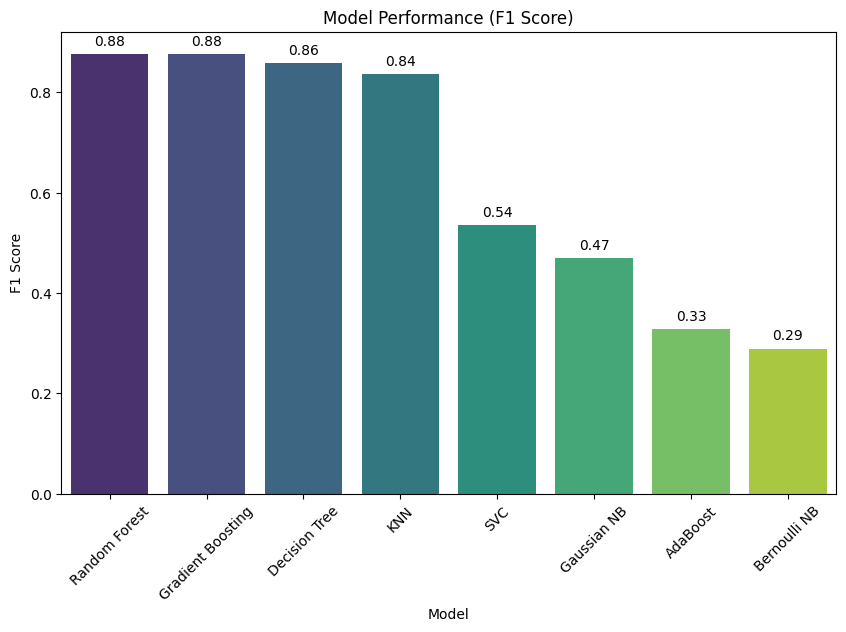

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='F1 Score', data=model_df, palette='viridis')
plt.title('Model Performance (F1 Score)')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

In [ ]:
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.6 MB/s eta 0:00:00


In [ ]:
import optuna
def objective(trial):
    # Define the hyperparameters to optimize
    if trial.suggest_categorical ('model', ['GradientBoosting', 'RandomForestClassifier', 'DecisionTree', 'KNN']):
       # Decision Tree
      max_depth = trial.suggest_int('max_depth', 3, 10)
      min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
      min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)

      model = DecisionTreeClassifier(
          max_depth=max_depth,
          min_samples_split=min_samples_split,
          min_samples_leaf=min_samples_leaf,
          random_state=0)
    elif trial.suggest_categorical('model', ['GradientBoosting', 'RandomForestClassifier', 'DecisionTree','KNN']):
      #randomforest
      n_estimators = trial.suggest_int('n_estimators', 100, 1000)
      max_depth = trial.suggest_int('max_depth', 3, 10)
      min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
      min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)

      model = RandomForestClassifier (
          n_estimators=n_estimators,
          max_depth=max_depth,
          min_samples_split=min_samples_split,
          min_samples_leaf=min_samples_leaf,
      )
    elif trial.suggest_categorical('model', ['GradientBoosting', 'RandomForestClassifier', 'DecisionTree','KNN']):
      #Gradient Boosting

        n_estimators = trial.suggest_int('n_estimators', 100, 1000)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        subsample = trial.suggest_float('subsample', 0.5, 1.0)

        model = GradientBoostingClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            subsample=subsample,
            random_state=0
        )
    else:
        # K-Nearest Neighbors Classifier
        n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
        weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
        p = trial.suggest_int('p', 1, 2)
        model = KNeighborsClassifier(
            n_neighbors=n_neighbors,
            weights=weights,
            p=p
        )


    return model.fit(x_train, y_train).score(x_test, y_test)

study = optuna.create_study(sampler=optuna.samplers.TPESampler(),direction='maximize')
study.optimize(objective, n_trials=200)


[I 2024-10-31 06:41:09,738] A new study created in memory with name: no-name-64f0a4e8-1cc8-4326-b81b-c01784c99427
[I 2024-10-31 06:41:09,757] Trial 0 finished with value: 0.7825059101654847 and parameters: {'model': 'DecisionTree', 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.7825059101654847.
[I 2024-10-31 06:41:09,770] Trial 1 finished with value: 0.7399527186761229 and parameters: {'model': 'KNN', 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.7825059101654847.
[I 2024-10-31 06:41:09,788] Trial 2 finished with value: 0.8297872340425532 and parameters: {'model': 'RandomForestClassifier', 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.8297872340425532.
[I 2024-10-31 06:41:09,802] Trial 3 finished with value: 0.8156028368794326 and parameters: {'model': 'GradientBoosting', 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is t

In [ ]:
print('Best parameters:', study.best_params)
print('Best f1_score:', study.best_value)

Best parameters: {'model': 'RandomForestClassifier', 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best f1_score: 0.8463356973995272


In [ ]:
import joblib

In [ ]:
joblib.dump(rfc, 'RandomForestClassifier.joblib')

# Load the model from the file
loaded_model = joblib.load('RandomForestClassifier.joblib')

# Make predictions with the loaded model
predictions = loaded_model.predict(x_test)
print(predictions)

[1 5 7 2 5 3 3 2 6 4 2 5 6 6 4 5 2 4 7 4 1 5 4 2 7 5 7 6 5 4 1 7 6 7 1 3 3
 3 2 3 7 7 6 1 7 1 2 7 6 3 7 5 6 1 2 5 6 5 5 5 4 5 7 6 7 3 5 2 4 4 5 2 2 6
 1 5 1 2 6 4 3 5 2 2 4 6 6 7 1 1 4 4 1 3 7 5 5 7 4 1 7 2 3 7 1 6 6 7 2 4 1
 5 5 1 1 2 1 2 6 5 4 6 7 3 5 7 7 7 2 1 3 4 7 4 6 3 2 6 7 1 6 3 4 3 2 7 3 7
 4 6 7 5 3 3 5 6 4 2 7 7 5 4 5 7 7 3 4 4 7 6 3 3 7 1 4 7 6 4 7 3 7 3 4 6 6
 7 5 6 3 7 7 6 7 5 6 7 4 2 1 2 7 5 7 1 6 2 6 2 7 6 7 4 7 5 4 4 1 5 7 3 1 1
 7 2 6 6 6 3 7 6 7 6 6 6 1 7 5 5 4 4 7 2 1 7 2 5 4 3 7 3 3 5 6 2 6 2 7 7 3
 1 7 4 2 4 7 2 1 2 7 6 5 7 2 1 7 5 5 6 4 1 2 6 6 4 7 1 2 2 6 6 6 5 6 6 6 2
 7 3 7 5 7 7 7 1 3 3 3 1 6 6 5 5 5 7 7 1 5 4 6 2 5 2 5 6 6 1 7 2 6 7 4 2 7
 4 7 1 5 7 6 2 7 1 4 2 6 3 6 5 6 1 4 2 3 5 7 5 4 2 6 3 2 7 3 3 7 5 3 3 1 7
 7 1 7 1 6 1 7 7 4 3 7 4 7 4 7 7 7 1 6 3 5 6 7 5 3 4 6 7 3 1 2 4 1 1 1 6 6
 7 4 1 1 3 5 7 7 7 5 4 1 2 2 2 7]


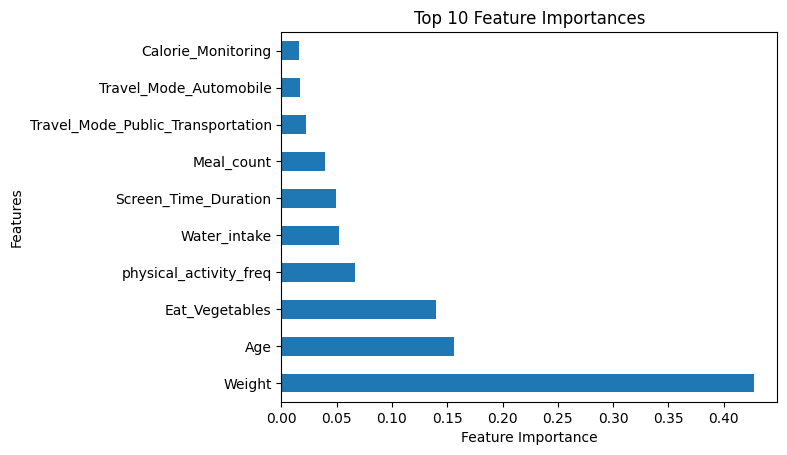

In [ ]:

feature_importances = pd.Series(rfc.feature_importances_, index=x_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()